In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('data/earthquakes.csv')
    covid = pd.read_csv('data/covid19_cases.csv').assign(
        date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
    ).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

<AxesSubplot:xlabel='date'>

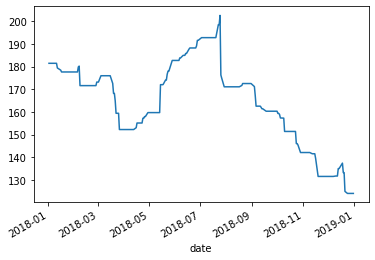

In [6]:
# Exercise 1
#Plot the rolling 20-day minimum of the Facebook closing price with the pandas method.

fb.close.rolling('20D').min().plot()



<AxesSubplot:title={'center':'change from open to close in the price of Facebook stock'}, ylabel='Density'>

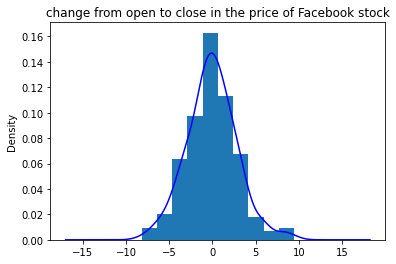

In [13]:
#Exercise 2
#Create a histogram and KDE of the change from open to close in the price of Facebook stock.

change_in_opentoclose = fb.open - fb.close
ax = change_in_opentoclose.plot(kind='hist', density=True, alpha=1)
change_in_opentoclose.plot(
    ax=ax, kind='kde', color='blue', 
    title='change from open to close in the price of Facebook stock'
)


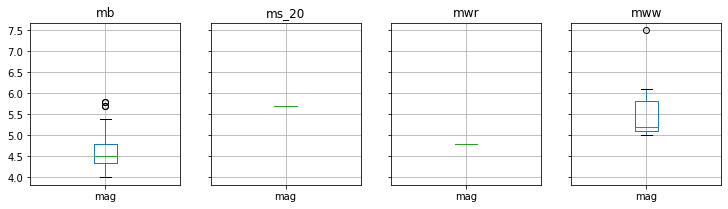

In [48]:
#Exercise 3
#Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

test = quakes.query("parsed_place == 'Indonesia'").iloc[:,:2].groupby('magType').boxplot(
    
    layout=(1, 4), figsize=(12, 3)
)



array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

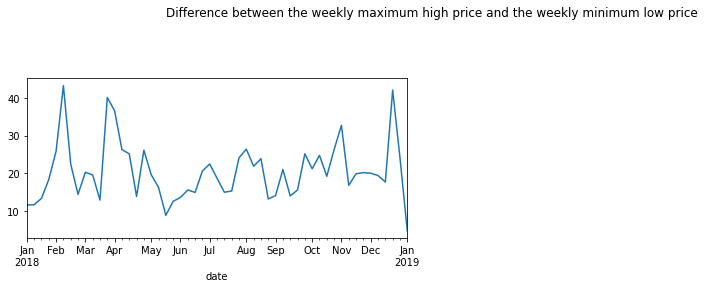

In [56]:
#Exercise 4
#Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook.
weekly_resampled_low = fb.low.resample('W').sum()
weekly_resampled_high = fb.high.resample('W').sum()

diff_weekly = weekly_resampled_high - weekly_resampled_low

diff_weekly.plot(
    kind='line',
    subplots=True,
    layout=(3, 2),
    figsize=(15, 10),
    title='Difference between the weekly maximum high price and the weekly minimum low price'
)




<AxesSubplot:xlabel='date'>

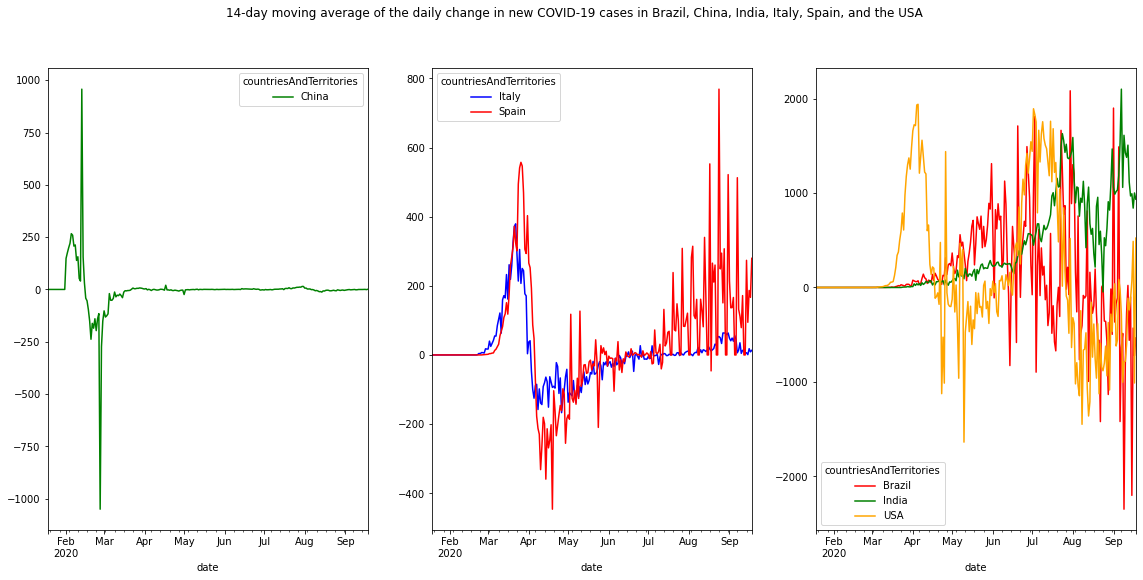

In [202]:

rol_mean_all_countries = covid.assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y'))\
    .set_index(['date', 'countriesAndTerritories'])\
    .unstack('countriesAndTerritories')\
    .cases.diff().rolling(14).mean().fillna(0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(19.5, 8.5, forward=True)
fig.suptitle('14-day moving average of the daily change in new COVID-19 cases in Brazil, China, India, Italy, Spain, and the USA')

rol_mean_all_countries[['China']].plot(ax=ax1, color='green')

rol_mean_all_countries[['Italy', 'Spain']].plot(ax=ax2, color=['blue', 'red'])

rol_mean_all_countries[['Brazil', 'India', 'USA']].plot(ax=ax3, color=['red', 'green', 'orange'])





<AxesSubplot:title={'center':'Monthly effect after hour trading'}, xlabel='date'>

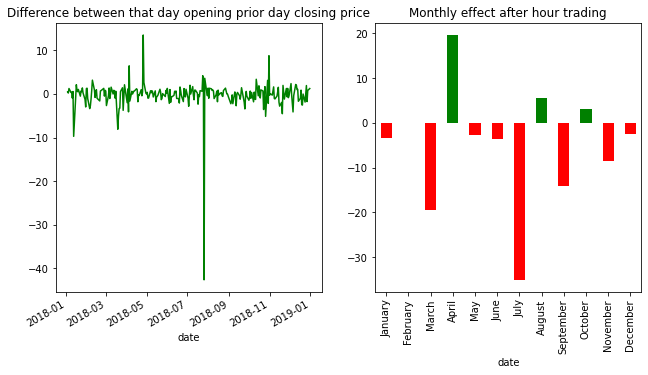

In [283]:
# Exercise 6


# The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's 
#closing price (be sure to review last chapter's time series section for an easy way to do this).


fb_abs = fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close
#     abs_change=lambda x: x.after_hours_change_in_price.abs()
)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10.5, 5.5, forward=True)
# fig.suptitle('difference between that day opening price and the prior day closing price')
fb_abs.after_hours_change_in_price.plot(ax=ax1, color='green', title='Difference between that day opening prior day closing price' )



monthy_net = fb_abs.after_hours_change_in_price.resample("1M").sum().fillna(0)
monthy_net.index = monthy_net.index.month_name()
my_color = np.where(monthy_net>=0, 'green', 'red')
monthy_net.plot(ax=ax2,  
                kind='bar',
                title='Monthly effect after hour trading',
                color = my_color)